# 特征工程

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# 用于在jupyter中进行绘图
%matplotlib inline

## 水果识别

### 1. 数据加载

In [2]:
# 加载数据集
fruits_df = pd.read_table('fruit_data_with_colors.txt')
fruits_df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
print('样本个数：', len(fruits_df))

样本个数： 59


In [4]:
# 创建目标标签和名称的字典
fruit_name_dict = dict(zip(fruits_df['fruit_label'], fruits_df['fruit_name']))
print(fruit_name_dict)

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}


In [5]:
# 划分数据集
X = fruits_df[['mass', 'width', 'height', 'color_score']]
y = fruits_df['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

In [6]:
print('数据集样本数：{}，训练集样本数：{}，测试集样本数：{}'.format(len(X), len(X_train), len(X_test)))

数据集样本数：59，训练集样本数：44，测试集样本数：15


### 2. 特征归一化

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for i in range(4):
    print('归一化前，训练数据第{}维特征最大值：{:.3f}，最小值：{:.3f}'.format(i + 1, 
                                           X_train.iloc[:, i].max(), 
                                           X_train.iloc[:, i].min()))
    print('归一化后，训练数据第{}维特征最大值：{:.3f}，最小值：{:.3f}'.format(i + 1, 
                                           X_train_scaled[:, i].max(), 
                                           X_train_scaled[:, i].min()))
    print()

归一化前，训练数据第1维特征最大值：356.000，最小值：76.000
归一化后，训练数据第1维特征最大值：1.000，最小值：0.000

归一化前，训练数据第2维特征最大值：9.200，最小值：5.800
归一化后，训练数据第2维特征最大值：1.000，最小值：0.000

归一化前，训练数据第3维特征最大值：10.500，最小值：4.000
归一化后，训练数据第3维特征最大值：1.000，最小值：0.000

归一化前，训练数据第4维特征最大值：0.920，最小值：0.550
归一化后，训练数据第4维特征最大值：1.000，最小值：0.000



<IPython.core.display.Javascript object>


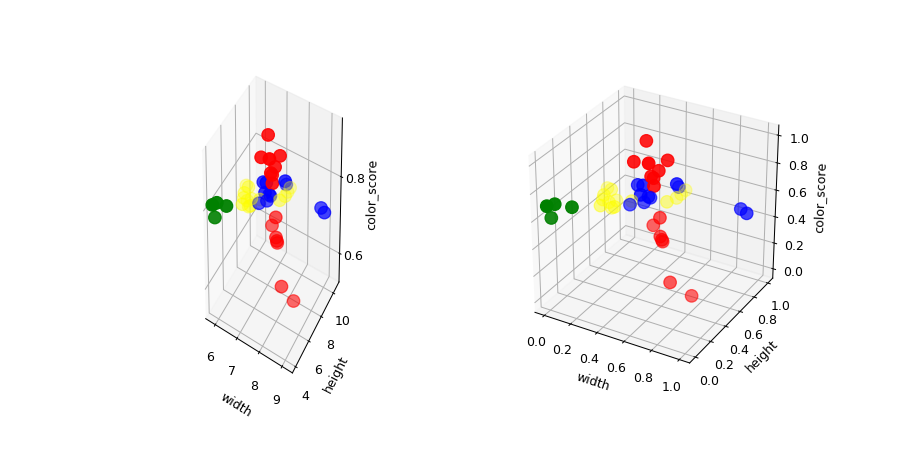

In [8]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

label_color_dict = {1: 'red', 2: 'green', 3: 'blue', 4: 'yellow'}
colors = list(map(lambda label: label_color_dict[label], y_train))

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d', aspect='equal')
ax1.scatter(X_train['width'], X_train['height'], X_train['color_score'], c=colors, marker='o', s=100)
ax1.set_xlabel('width')
ax1.set_ylabel('height')
ax1.set_zlabel('color_score')

ax2 = fig.add_subplot(122, projection='3d', aspect='equal')
ax2.scatter(X_train_scaled[:, 1], X_train_scaled[:, 2], X_train_scaled[:, 3], c=colors, marker='o', s=100)
ax2.set_xlabel('width')
ax2.set_ylabel('height')
ax2.set_zlabel('color_score')

plt.show()

### 3. 归一化对结果的影响

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
# 在未归一化的数据上进行训练并测试
knn.fit(X_train, y_train)
print('未归一化特征，测试准确率：{:.3f}'.format(knn.score(X_test, y_test)))

# 在归一化的数据上进行训练并测试
knn.fit(X_train_scaled, y_train)
print('归一化特征后，测试准确率：{:.3f}'.format(knn.score(X_test_scaled, y_test)))

未归一化特征，测试准确率：0.533
归一化特征后，测试准确率：1.000


### 4. 标签编码和独热编码

In [10]:
# 随机生成有序型特征和类别特征作为例子
X_train = np.array([['male', 'low'],
                  ['female', 'low'],
                  ['female', 'middle'],
                  ['male', 'low'],
                  ['female', 'high'],
                  ['male', 'low'],
                  ['female', 'low'],
                  ['female', 'high'],
                  ['male', 'low'],
                  ['male', 'high']])

X_test = np.array([['male', 'low'],
                  ['male', 'low'],
                  ['female', 'middle'],
                  ['female', 'low'],
                  ['female', 'high']])

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 在训练集上进行编码操作
label_enc1 = LabelEncoder() # 首先将male, female用数字编码
one_hot_enc = OneHotEncoder() # 将数字编码转换为独热编码

label_enc2 = LabelEncoder() # 将low, middle, high用数字编码

tr_feat1_tmp = label_enc1.fit_transform(X_train[:, 0]).reshape(-1, 1) # reshape(-1, 1)保证为一维列向量
tr_feat1 = one_hot_enc.fit_transform(tr_feat1_tmp) 
tr_feat1 = tr_feat1.todense()

tr_feat2 = label_enc2.fit_transform(X_train[:, 1]).reshape(-1, 1)

X_train_enc = np.hstack((tr_feat1, tr_feat2))
print(X_train_enc)

[[0. 1. 1.]
 [1. 0. 1.]
 [1. 0. 2.]
 [0. 1. 1.]
 [1. 0. 0.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 0. 0.]
 [0. 1. 1.]
 [0. 1. 0.]]


In [12]:
# 在测试集上进行编码操作

te_feat1_tmp = label_enc1.transform(X_test[:, 0]).reshape(-1, 1) # reshape(-1, 1)保证为一维列向量
te_feat1 = one_hot_enc.transform(te_feat1_tmp) 
te_feat1 = te_feat1.todense()

te_feat2 = label_enc2.transform(X_test[:, 1]).reshape(-1, 1)

X_test_enc = np.hstack((te_feat1, te_feat2))
print(X_test_enc)

[[0. 1. 1.]
 [0. 1. 1.]
 [1. 0. 2.]
 [1. 0. 1.]
 [1. 0. 0.]]
